In [60]:
#导入库numpy和matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [61]:
#读取图片，转换为列表
#这里可以换成自己的图片名
myimg = plt.imread('timg_16.jpg')
myimg_list = myimg.tolist()

In [62]:
#用于显示图片的函数
def show_image(nparray):
    plt.imshow(nparray)
    plt.show()
    pass

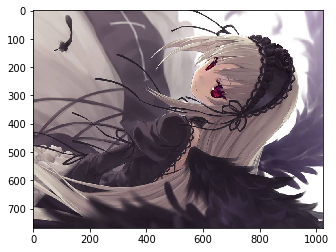

width:1024pix
height:768pix


In [63]:
#显示图片
show_image(np.array(myimg_list))
print('width:'+str(len(myimg_list[0]))+'pix')
print('height:'+str(len(myimg_list))+'pix')

In [64]:
width = len(myimg_list[0])
height = len(myimg_list)

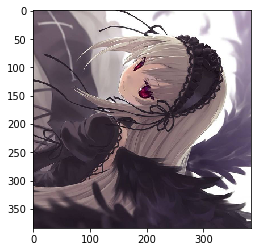

In [65]:
#裁剪图片
cut_image = []
cut_image_h = 0

for h in myimg_list[0:768:2]:
    cut_image.append([])
    for pix in h[1024-768:1024:2]:
        cut_image[cut_image_h].append(pix)
        pass
    cut_image_h += 1
    pass

show_image(np.array(cut_image))


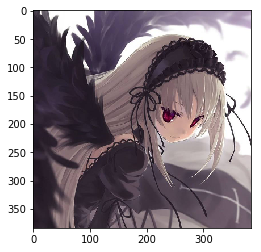

In [66]:
#裁剪头像
avatar = []
avatar_image_h = 0

for h in myimg_list[0:768:2]:
    avatar.append([])
    for pix in h[1024-768:1024:2]:
        avatar[avatar_image_h].append(pix)
        pass
    avatar_image_h += 1
    pass

avatar_size = len(avatar)
#作镜像
for h in range(avatar_size):
    for w in range(avatar_size-h):
        temp = avatar[h][w]
        avatar[h][w] = avatar[avatar_size-1-w][avatar_size-1-h]
        avatar[avatar_size-1-w][avatar_size-1-h] = temp
        pass
    pass

show_image(np.array(avatar))

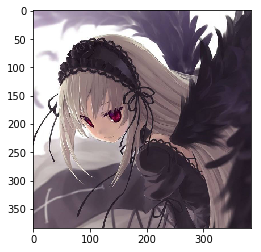

In [67]:
#翻转
for h in range(avatar_size):
    for w in range(int(avatar_size/2)):
        temp = avatar[h][w]
        avatar[h][w] = avatar[h][avatar_size-1-w]
        avatar[h][avatar_size-1-w] = temp
        pass
    pass

show_image(np.array(avatar))

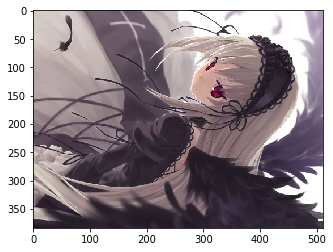

In [68]:
#maxpool
width = len(myimg_list[0])
height = len(myimg_list)

ws = np.arange(0, width, 2)
hs = np.arange(0, height, 2)

maxpool_image=[]

for h in hs:
    maxpool_image.append([])
    for w in ws:
        reds = []
        greens = []
        blues = []
        try:
            pix = myimg_list[h][w]
            reds.append(pix[0])
            greens.append(pix[1])
            blues.append(pix[2])
        except:
            pass
        try:
            pix = myimg_list[h+1][w]
            reds.append(pix[0])
            greens.append(pix[1])
            blues.append(pix[2])
        except:
            pass
        try:
            pix = myimg_list[h][w+1]
            reds.append(pix[0])
            greens.append(pix[1])
            blues.append(pix[2])
        except:
            pass
        try:
            pix = myimg_list[h+1][w+1]
            reds.append(pix[0])
            greens.append(pix[1])
            blues.append(pix[2])
        except:
            pass
        new_pix = [max(reds), max(greens), max(blues)]
        now_height = int(h/2)
        maxpool_image[now_height].append(new_pix)
        pass
    pass

show_image(np.array(maxpool_image))

In [69]:
#sobel算子
sobel = [[-1,-1,-1],
         [ 0, 0, 0],
         [ 1, 1, 1]]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


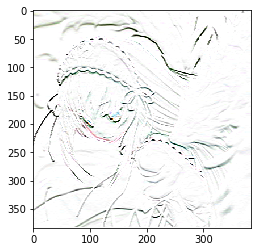

In [70]:
#做卷积
conv_img = avatar

ws = np.arange(0, len(conv_img), 1)
hs = np.arange(0, len(conv_img), 1)

output = []

for h in hs:
    output.append([])
    for w in ws:
        try:
            red = (conv_img[h][w][0]+conv_img[h][w+1][0]+conv_img[h][w+2][0])*(-1) + \
            (conv_img[h+2][w][0]+conv_img[h+2][w+1][0]+conv_img[h+2][w+2][0])*(1)
            green = (conv_img[h][w][1]+conv_img[h][w+1][1]+conv_img[h][w+2][1])*(-1) + \
            (conv_img[h+2][w][1]+conv_img[h+2][w+1][1]+conv_img[h+2][w+2][1])*(1)
            blue = (conv_img[h][w][2]+conv_img[h][w+1][2]+conv_img[h][w+2][2])*(-1) + \
            (conv_img[h+2][w][2]+conv_img[h+2][w+1][2]+conv_img[h+2][w+2][2])*(1)
            new_pix = [255-int(red),255-int(blue),255-int(green)]
            pass
        except:
            pass
        now_height = int(h)
        output[now_height].append(new_pix)
        pass
    pass

show_image(np.array(output))